<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-4/blob/main/decision_trees_and_its_variant_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

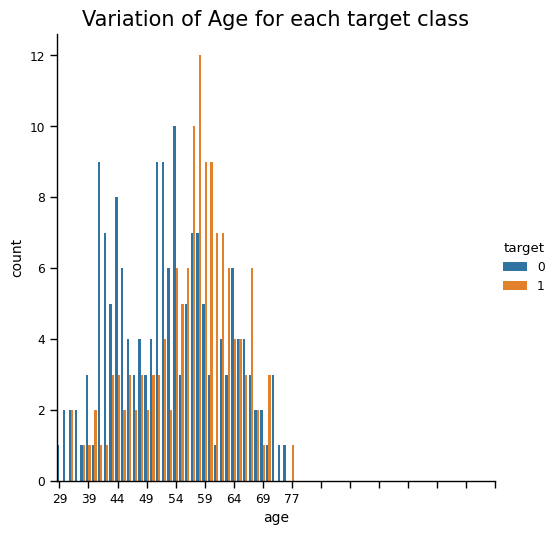

In [5]:
df = pd.read_csv("cleveland.csv", header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

sns.set_context('paper', font_scale=1, rc={"font.size" : 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x="age", hue="target", order=df["age"].sort_values().unique())
#ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0,80,5))

plt.title('Variation of Age for each target class')
plt.show()

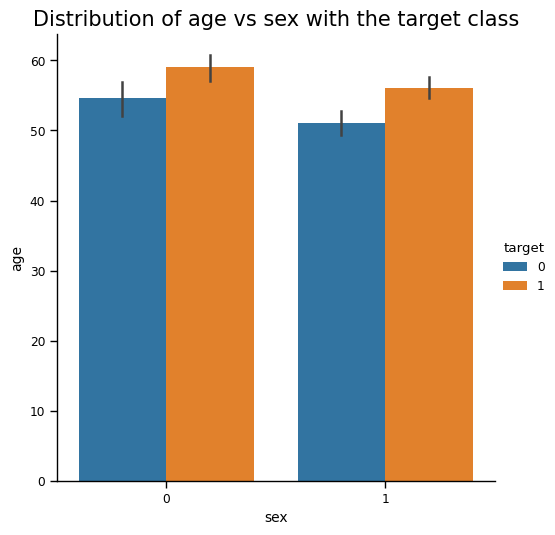

In [6]:
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title("Distribution of age vs sex with the target class")
plt.show()

## KNN

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for KNN: {accuracy_for_train}")
print(f"Accuracy for test set for KNN: {accuracy_for_test}")


Accuracy for training set for KNN: 0.76
Accuracy for test set for KNN: 0.69


# Decision Tree


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for DecisionTreeClassifier: {accuracy_for_train}")
print(f"Accuracy for test set for DecisionTreeClassifier: {accuracy_for_test}")


Accuracy for training set for DecisionTreeClassifier: 1.0
Accuracy for test set for DecisionTreeClassifier: 0.75


# Random Forest


In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for RandomForestClassifier: {accuracy_for_train}")
print(f"Accuracy for test set for RandomForestClassifier: {accuracy_for_test}")


Accuracy for training set for RandomForestClassifier: 1.0
Accuracy for test set for RandomForestClassifier: 0.87


# AdaBoost

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for AdaBoostClassifier: {accuracy_for_train}")
print(f"Accuracy for test set for AdaBoostClassifier: {accuracy_for_test}")


Accuracy for training set for AdaBoostClassifier: 0.88
Accuracy for test set for AdaBoostClassifier: 0.9


# GradientBoost

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=1, min_samples_split=2, max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for GradientBoostingClassifier: {accuracy_for_train}")
print(f"Accuracy for test set for GradientBoostingClassifier: {accuracy_for_test}")


Accuracy for training set for GradientBoostingClassifier: 1.0
Accuracy for test set for GradientBoostingClassifier: 0.85


# SVM

In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for SVC: {accuracy_for_train}")
print(f"Accuracy for test set for SVC: {accuracy_for_test}")


Accuracy for training set for SVC: 0.66
Accuracy for test set for SVC: 0.67


# Stacking

In [13]:
from xgboost import XGBClassifier

In [15]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
ad = AdaBoostClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
gc = GradientBoostingClassifier(random_state=42)

clf = [('dfc', dtc), ('rfc', rfc), ('ad', ad), ('svc', svc), ('knn', knn), ('gc', gc)]

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import StackingClassifier
xgb = XGBClassifier(random_state=42)
classifier = StackingClassifier(estimators=clf, final_estimator=xgb)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print(f"Accuracy for training set for StackingClassifier: {accuracy_for_train}")
print(f"Accuracy for test set for StackingClassifier: {accuracy_for_test}")


Accuracy for training set for StackingClassifier: 0.88
Accuracy for test set for StackingClassifier: 0.89


# Feature Importance

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = DecisionTreeClassifier(criterion='gini')

clf.fit(X_train, y_train)

DecisionTreeClassifier()

<Axes: >

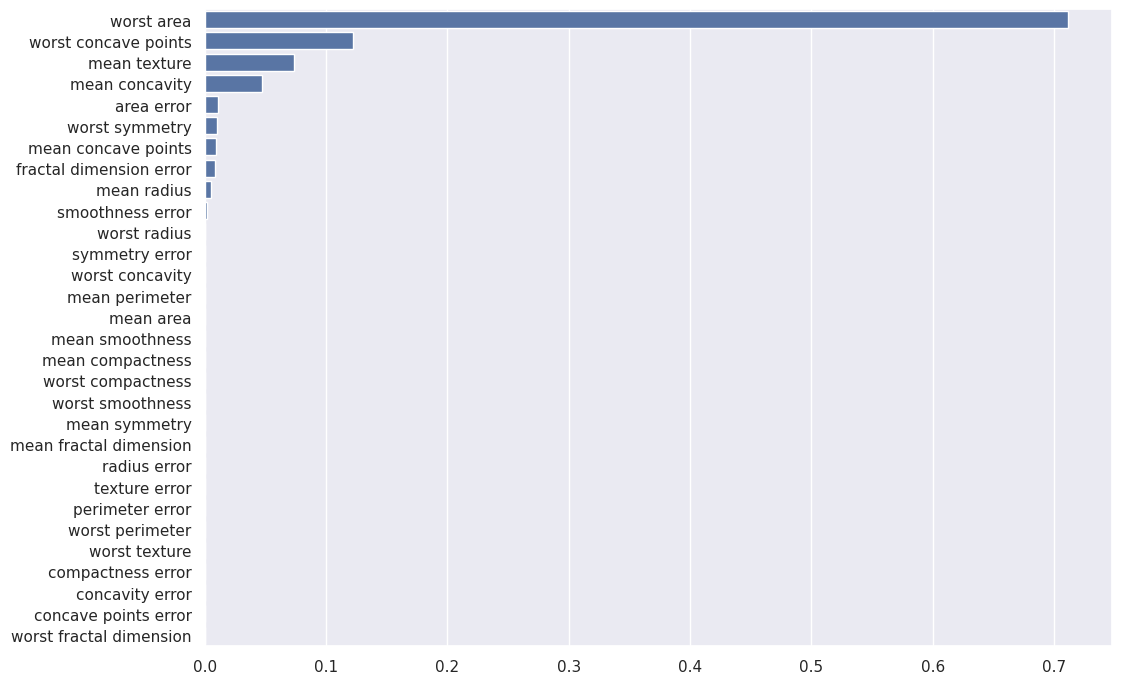

In [18]:
feature_importances = clf.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = dataset.feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)